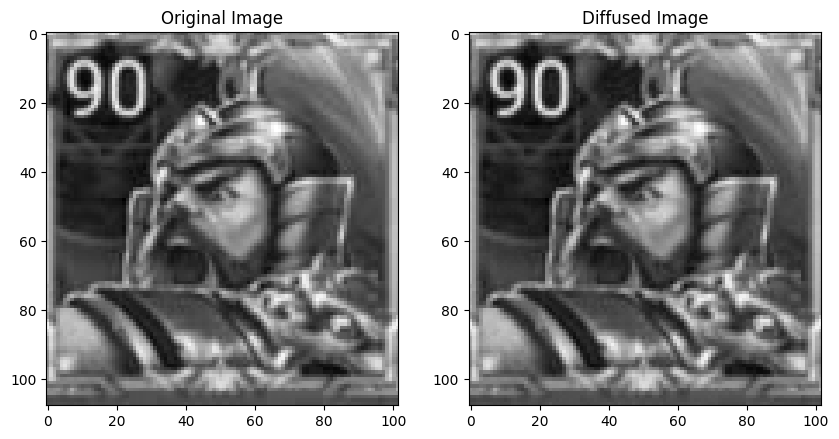

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def forward_diffusion_2D(image, noise_strength_fn, nsteps, dt):
    """
    Simulate forward diffusion on a 2D image.
    image: Initial image (2D array)
    noise_strength_fn: Function of time, outputs scalar noise strength
    nsteps: Number of diffusion steps
    dt: Time step size
    """
    x = image.astype(np.float32)
    t = np.arange(nsteps) * dt

    for i in range(nsteps):
        noise_strength = noise_strength_fn(t[i])
        noise = np.random.randn(*x.shape)  # Random noise for each pixel
        x += noise_strength * noise * np.sqrt(dt)  # Diffusion step

    return np.clip(x, 0, 255).astype(np.uint8)  # Clip to valid image range


# Example noise strength function: constant
def noise_strength_constant(t):
    return 1

# Load a grayscale image
image = plt.imread('./1.jpg')  # Replace with your image path
if image.ndim == 3:  # Convert RGB to grayscale if necessary
    image = np.mean(image, axis=-1)

# Parameters
nsteps = 100
dt = 0.01

# Apply diffusion
diffused_image = forward_diffusion_2D(image, noise_strength_constant, nsteps, dt)

# Plot original and diffused image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Diffused Image")
plt.imshow(diffused_image, cmap='gray')
plt.show()
